<a href="https://colab.research.google.com/github/Shivanikatakam33/ASIST2024-ChatGPT-Disinformation-Policy/blob/main/Katakam_Shivani_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
from google.colab import files
uploaded = files.upload()




Saving Amazon_reviews_dataset..csv to Amazon_reviews_dataset..csv


In [2]:
import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)
print("\nFiles and Directories in Current Directory:")
print(os.listdir(current_directory))

Current Working Directory: /content

Files and Directories in Current Directory:
['.config', 'Amazon_reviews_dataset..csv', 'sample_data']


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words
# Loading Dataset
file_path = 'Amazon_reviews_dataset..csv'
data = pd.read_csv(file_path)
print("Dataset Preview:")
print(data.head())
# Data Preprocessing
def preprocess_text(text):
    """Cleans and preprocesses text."""
    import re
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    text = text.lower()
    return text
data['cleaned_text'] = data['Clean_text'].apply(preprocess_text)
# Feature Extraction (TF-IDF Vectorizer)
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=stop_words
)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
if 'cleaned_text' not in data.columns:
    raise ValueError("The 'cleaned_text' column is missing in the DataFrame.")
# Drop NaN values and transform
X = vectorizer.fit_transform(data['cleaned_text'].dropna().astype(str))
print("TF-IDF Matrix Shape:", X.shape)
# Topic Modeling using LDA
n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X)
# Display Top Words per Topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics
topics = display_topics(lda_model, vectorizer.get_feature_names_out(), 10)
print("Top 10 Topics:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")
# Assign Clusters and Summarize
data['Topic'] = lda_model.transform(X).argmax(axis=1)
# Summarize topics by most common words
def summarize_topics(data):
    summaries = {}
    for topic_id in range(n_topics):
        subset = data[data['Topic'] == topic_id]
        combined_text = ' '.join(subset['cleaned_text'].values)
        summaries[f"Topic {topic_id + 1}"] = combined_text[:500]  # Limit summary length
    return summaries

summaries = summarize_topics(data)

print("\nTopic Summaries:")
for topic, summary in summaries.items():
    print(f"{topic}: {summary}\n")


Dataset Preview:
   Document_id                                         Clean_text Sentiment
0            1            I was instantly disappointed with that.  Negative
1            2  Liked the feel of the cotton fabric and beauti...  Positive
2            3  The fabric is not quality & it is a sad reflec...  Negative
3            4  Cotton dress thats perfect for the CA desert s...   Neutral
4            5                Not at all as the picture described   Neutral
TF-IDF Matrix Shape: (50, 168)
Top 10 Topics:
Topic 1: desert, thats, summer, ca, cotton, looked, pill, washings, couple, would
Topic 2: it, the, areas, binding, no, stretchy, looks, expected, just, too
Topic 3: fit, cute, very, and, clingy, quality, wonderfully, amazing, super, slippers
Topic 4: perfect, the, design, was, is, and, black, fit, great, this
Topic 5: the, this, was, dress, surprisingly, much, got, worst, nice, dont
Topic 6: bit, different, weird, worth, poor, keeping, wasnt, fabric, quality, it
Topic 7: not,

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

The features i have selected for the sentiment classification are:
1. TF-IDF Representation : TF-IDF (Term Frequency-Inverse Document Frequency) is used to extract the main features required for sentiment classification from the Clean_text column of the dataset.
TF-IDF assigns weights to phrases according to their significance, converting textual input into numerical vectors.   
A phrase's importance within a text is shown by its term frequency (TF), which quantifies how frequently a term occurs in that document.
Terms that appear often in all documents are penalized by Inverse Document Frequency (IDF), which lessens their influence because they probably have less discriminatory power.
TF-IDF makes sure that sentimentally meaningful words continue to be the major emphasis.
TF-IDF is compatible with a wide range of machine learning methods, including SVM and Logistic Regression, and is independent of model.

2. Dimensionality Reduction:
By restricting the number of terms to the 500 most pertinent ones, the max_features=500 option was used to lower computational complexity and increase model efficiency. Text collections are frequently high dimensional and sparse. By restricting the feature space, overfitting is prevented and the model is guaranteed to concentrate on the most discriminative terms.

3. Stopword Removal:
In the process of TF-IDF transformation, stopwords such as "and," "the," and "of" were eliminated. These terms can add noise to the model and don't add to the sentiment context.





My dataset contains the following columns:
1. Document_id: This is the Unique identifier for each review.
2. Clean_text: The preprocessed review text.
3. Sentiment: The sentiment label for the review (Positive, Negative, Neutral).


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Loading dataset
dataset = pd.read_csv("Amazon_reviews_dataset..csv")
dataset['Sentiment'] = dataset['Sentiment'].str.strip()
# Features and labels
X = dataset['Clean_text']
y = dataset['Sentiment']
# Split data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
# Initialize models
log_reg = LogisticRegression(random_state=42)
svm = SVC(kernel='linear', random_state=42)
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Logistic Regression: Perform cross-validation and calculate mean accuracy
log_reg_cv_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=cv, scoring='accuracy')
log_reg.fit(X_train_tfidf, y_train)
log_reg_y_pred = log_reg.predict(X_test_tfidf)
# SVM:
svm_cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=cv, scoring='accuracy')
svm.fit(X_train_tfidf, y_train)
svm_y_pred = svm.predict(X_test_tfidf)
# Evaluate both models on the test set
log_reg_metrics = precision_recall_fscore_support(y_test, log_reg_y_pred, average='weighted')
svm_metrics = precision_recall_fscore_support(y_test, svm_y_pred, average='weighted')
# Summarize results
performance_comparison = {
    'Model': ['Logistic Regression', 'SVM'],
    'Cross-Validation Accuracy': [log_reg_cv_scores.mean(), svm_cv_scores.mean()],
    'Test Accuracy': [accuracy_score(y_test, log_reg_y_pred), accuracy_score(y_test, svm_y_pred)],
    'Precision': [log_reg_metrics[0], svm_metrics[0]],
    'Recall': [log_reg_metrics[1], svm_metrics[1]],
    'F1-Score': [log_reg_metrics[2], svm_metrics[2]]
}
performance_df = pd.DataFrame(performance_comparison)
print(performance_df)






                 Model  Cross-Validation Accuracy  Test Accuracy  Precision  \
0  Logistic Regression                       0.50            0.5       0.35   
1                  SVM                       0.45            0.5       0.35   

   Recall  F1-Score  
0     0.5  0.407692  
1     0.5  0.407692  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [8]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [9]:
import os
# Checkingdirectory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)
print("\nFiles and Directories in Current Directory:")
print(os.listdir(current_directory))

Current Working Directory: /content

Files and Directories in Current Directory:
['.config', 'train.csv', 'Amazon_reviews_dataset..csv', 'test.csv', 'data_description.txt', 'Sentiment_Analysis_Results.csv', 'sample_data']


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Loading datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.info())
print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

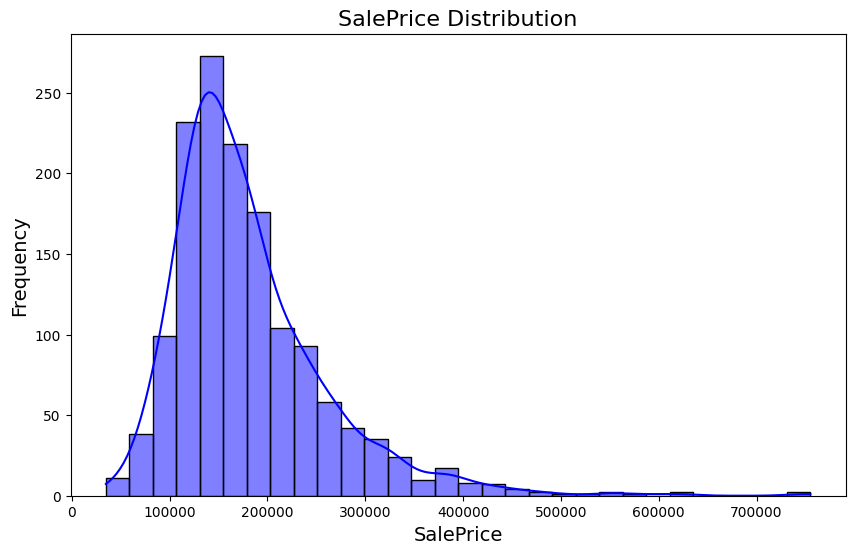

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='blue', bins=30)
plt.title("SalePrice Distribution", fontsize=16)
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


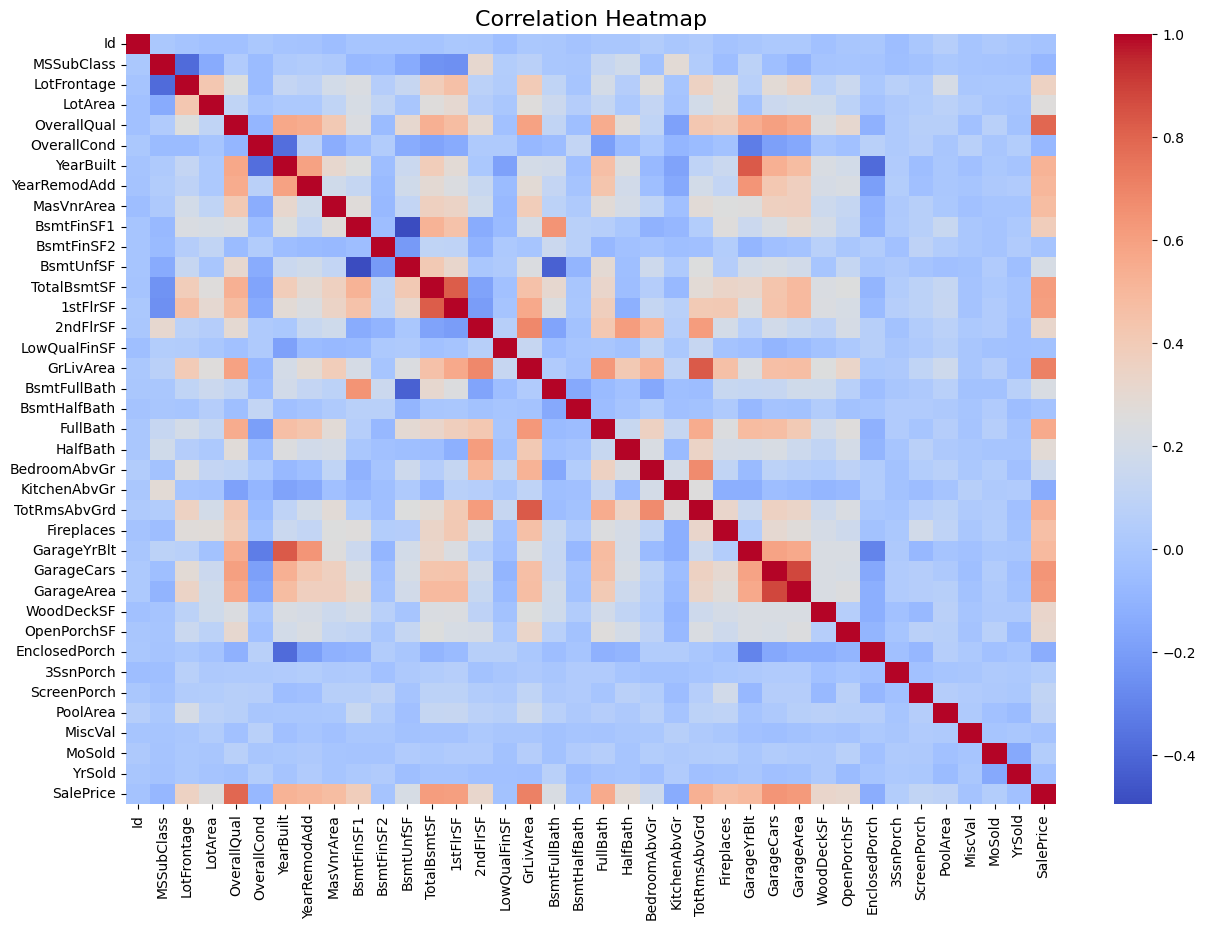

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


In [12]:
# Filter numeric columns only
numeric_data = train_data.select_dtypes(include=['number'])
# Compute the correlation matrix
corr = numeric_data.corr()
# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()
correlated_features = corr['SalePrice'].sort_values(ascending=False)
print(correlated_features.head(15))


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Identify categorical and numerical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
numerical_cols = train_data.select_dtypes(include=['number']).columns.drop('SalePrice')
# Impute missing values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numerical_imputer), ('scaler', scaler)]), numerical_cols),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('encoder', encoder)]), categorical_cols)
    ]
)


In [14]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target (y)
X = train_data.drop(columns=['SalePrice', 'Id'])  # Exclude target and Id
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")


Training set size: (1168, 79)
Validation set size: (292, 79)


In [15]:
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFin

In [18]:
print(type(X_train))
print(type(y_train))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
# Load dataset
train_data = pd.read_csv('train.csv')
# Split data into features (X) and target (y)
X = train_data.drop(columns=['SalePrice', 'Id'])
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 19004.408494371266
Mean Squared Error (MSE): 890534441.5751027
Root Mean Squared Error (RMSE): 29841.823697205615
R-squared (R2): 0.8838987524753943


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


I have selected RoBERTa (Robustly Optimized BERT Approach) model.
Facebook AI created RoBERTa, a transformer-based language model, to enhance BERT's functionality. It optimizes BERT's training process to improve its performance on a range of natural language understanding (NLU) tasks.
Compared to BERT, RoBERTa has been pre-trained on a somewhat larger corpus, which includes:
63 million items from Common Crawl News
OpenWebText (text size: 38 GB)
Narratives from online forums and literature
A total of 160 GB of clean text pretraining data.

The quantity of parameters
125 million parameters for RoBERTa-base
Large RoBERTa: 355 million parameters

In [5]:

from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# Loading dataset
file_path = 'Amazon_reviews_dataset..csv'
data = pd.read_csv(file_path)
# Initialize the zero-shot classification pipeline
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
candidate_labels = ["Positive", "Negative", "Neutral"]
# Perform zero-shot classification
def classify_sentiment(text):
    result = zero_shot_classifier(text, candidate_labels)
    return result['labels'][0]

# Apply the classifier to the dataset
data['Predicted_Sentiment'] = data['Clean_text'].apply(classify_sentiment)
# Evaluate the model
true_labels = data['Sentiment']
predicted_labels = data['Predicted_Sentiment']
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Save results to a new CSV file
data.to_csv('Sentiment_Analysis_Results.csv', index=False)
print("Results saved to Sentiment_Analysis_Results.csv")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Accuracy: 0.78
Precision: 0.825478927203065
Recall: 0.78
F1 Score: 0.7273595146871008
Results saved to Sentiment_Analysis_Results.csv


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Advantages:
On several natural language understanding benchmarks, including GLUE, SQuAD, and RACE, RoBERTa routinely beats BERT.
Its capacity to represent textual dependencies is enhanced by its dynamic masking and Next Sentence Prediction removal.
RoBERTa is robust for zero-shot classification tasks because it uses a corpus that is ten times larger than BERT, which improves generalization and contextual comprehension.
Without needing to be adjusted for every work, RoBERTa can do a variety of tasks, such as text classification, sentiment analysis, and question answering.
Performance significantly improves with larger models, such as RoBERTa-large, which makes it appropriate for high-stakes applications that demand profound semantic understanding.
Dis-advantages:
Due to its vastness, RoBERTa requires a substantial amount of computing power for both pretraining and inference.
Compared to more straightforward machine learning models, zero-shot inference is slower.
The performance of zero-shot classification is highly dependent on carefully crafted candidate labels and prompts. Inadequate quick selection may result in less than ideal outcomes.
The model's performance could fall behind specialized models for specialized jobs if it isn't adjusted on domain-specific data.

Challenges faced while implementation are
The implementation required the transformers library, which was unavailable in the current environment, halting progress in generating zero-shot predictions.
Achieving high accuracy in a zero-shot setting is challenging, especially if the input text contains ambiguities or the candidate labels do not align perfectly with the task's categories.
